In [3]:
from pandas import *
from numpy import *
from numpy.linalg import * # utile pour l'inversion de matrice et la diagonalisation
from matplotlib.pylab import *


# Exercice 1 : diagonalisation

On considère la matrice
\begin{align*}
A=\begin{pmatrix}
1 & -7 & -2\\
-7 & 1 & 2\\
-2 & 2 & 10
\end{pmatrix}.
\end{align*}

**Question 1.** Diagonaliser la matrice avec la commande `eigh` (eigenvalue signifie valeur propre en anglais) qui renvoie les valeurs propres (à stocker dans un vecteur `val`) et les vecteurs propres (à stocker dans une matrice `P`). Afficher `val`et `P`.



In [4]:
A=array([[1,-7,-2],[-7,1,2],[-2,2,10]])
val, P = eigh(A)
print("Valeurs propres de A : ", val)
print("Matrice contenant en colonnes les vecteurs propres de A \n", around(P, 2))

Valeurs propres de A :  [-6.  6. 12.]
Matrice contenant en colonnes les vecteurs propres de A 
 [[-0.71  0.58 -0.41]
 [-0.71 -0.58  0.41]
 [ 0.    0.58  0.82]]


**Question 2.** Vérifier que les matrices obtenues constituent bien une diagonalisation de A et que la base des vecteurs propres est bien orthonormée, comme dans le théorème page 5 du poly.

In [5]:
# A vérifier : 
# - P est inversible et (inverse de P = transposée de P)
Pinv = inv(P)
print("Inverse de P = transposée de P : \n", around(Pinv) == around(P.T))
# - D est diagonale avec les valeurs propres sur la diagonale (pas vraiment une vérification, mais on en a besoin pour la suite)
D = diag(val)
print("D contient les valeurs propre à P sur sa diagonale :\n", D)
# - P*D*P^(-1) = matrice de départ
print("P*D*P^(-1) = matrice de départ :\n", around(A) == around(dot(dot(P, D),inv(P))))


Inverse de P = transposée de P : 
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
D contient les valeurs propre à P sur sa diagonale :
 [[-6.  0.  0.]
 [ 0.  6.  0.]
 [ 0.  0. 12.]]
P*D*P^(-1) = matrice de départ :
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


**Question 3.** On fournit ci-dessous les instructions pour définir un nouveau vecteur appelé `val2` contenant les valeurs propres du vecteur `val` rangées en ordre décroissant et adapter la matrice de changement de base en une nouvelle matrice `P2` de sorte à obtenir une nouvelle diagonalisation de $A$.

Afficher val2 et `P2` pour bien comprendre ce qui fournissent les instructions. Vérifier que $^t\!P2=(P2)^{-1}$ et que $A=P2\,diag(val2)\,(P2)^{-1}$.

In [6]:
ind = argsort(val)[::-1] # indices de val ordonnées de manière décroissante
val2 = sort(val)[::-1] # valeurs propres ordonnées de manière décroissante
P2 = zeros((3,3))
for i in range(3):
    P2[:,i]=P[:,ind[i]]
# Affichage et vérification
print("Indices ordonnés :")
print(argsort(val), "-->", ind, '\n')
print("Valeurs propres ordonnés :")
print(val, "-->", val2, '\n')
print("Vecteurs propres ordonnés :")
print(around(P[0,:], 2), "-->", around(P2[0,:], 2))
print(around(P[1,:], 2), "-->", around(P2[1,:], 2))
print(around(P[2,:], 2), "   -->", around(P2[2,:], 2))

Indices ordonnés :
[0 1 2] --> [2 1 0] 

Valeurs propres ordonnés :
[-6.  6. 12.] --> [12.  6. -6.] 

Vecteurs propres ordonnés :
[-0.71  0.58 -0.41] --> [-0.41  0.58 -0.71]
[-0.71 -0.58  0.41] --> [ 0.41 -0.58 -0.71]
[0.   0.58 0.82]    --> [0.82 0.58 0.  ]


**Question 4.** En utilisant la commande `trace`, calculer la trace de $A$ et vérifier que $\mathrm{tr}(A) = \lambda_1 +\lambda_2+\lambda_3$.

In [7]:
print("Trace de A (", trace(A), ")", "= Somme des valeurs propres (", sum(val), ')', ':', trace(A) == sum(val))

Trace de A ( 12 ) = Somme des valeurs propres ( 12.0 ) : True


## Exercice 2 : ACP sur les données "jouet"

**1.** Reprendre les données "jouet" définies lors du TP précédent et recalculer la matrice de corrélation.

In [8]:
X = array([[12, 16, 14], [14, 13, 15], [8, 11, 8], [10, 9, 6], [16, 6, 17]])
print("Données de départ :")
print(X, '\n')

Z = zeros((5,3))
for j in range(3) :
    Z[:,j] = (X[:,j] - mean(X[:,j])) / sqrt(var(X[:,j]))
    R = 1/5 * dot(Z.T, Z), 2
print("Données centrées et réduites : \n", around(Z, 2), '\n')

R = 1/5 * dot(Z.T, Z)
print("Matrice de corrélation : \n", around(R, 2))

Données de départ :
[[12 16 14]
 [14 13 15]
 [ 8 11  8]
 [10  9  6]
 [16  6 17]] 

Données centrées et réduites : 
 [[ 0.    1.47  0.47]
 [ 0.71  0.59  0.71]
 [-1.41  0.   -0.94]
 [-0.71 -0.59 -1.41]
 [ 1.41 -1.47  1.18]] 

Matrice de corrélation : 
 [[ 1.   -0.25  0.9 ]
 [-0.25  1.    0.04]
 [ 0.9   0.04  1.  ]]


**2.** Diagonaliser la matrice de corrélation, puis réordonner les valeurs propres en ordre décroissant et réordonner les vecteurs propres associés. Afficher les résultats et effectuer les vérifications nécessaires.

In [10]:
val, P = eigh(R)
print("Valeurs propres de R : \n", around(val, 2), '\n')
print("Somme des valeurs propres (egal à p, le nombre de variables) : \n", around(sum(val), 2), '\n')
print("Matrice contenant en colonnes les vecteurs propres de X \n", around(P, 2), '\n')

ind = argsort(val)[::-1] # indices de val ordonnées de manière décroissante
val2 = sort(val)[::-1] # valeurs propres ordonnées de manière décroissante
Pord = zeros((3,3))
for i in range(3):
    Pord[:,i] = P[:,ind[i]]
# Affichage et vérification
print("Indices ordonnés :")
print(argsort(val), "-->", ind, '\n')
print("Valeurs propres ordonnés :")
print(val, "-->", val2, '\n')
print("Vecteurs propres ordonnés :")
print(around(P[0,:], 2), "-->", around(Pord[0,:], 2))
print(around(P[1,:], 2), "-->", around(Pord[1,:], 2))
print(around(P[2,:], 2), "-->", around(Pord[2,:], 2))

print(mean(Z[:,0]))

Valeurs propres de R : 
 [0.05 1.02 1.92] 

Somme des valeurs propres (egal à p, le nombre de variables) : 
 3.0 

Matrice contenant en colonnes les vecteurs propres de X 
 [[ 0.7  -0.04  0.71]
 [ 0.21  0.96 -0.16]
 [-0.68  0.27  0.68]] 

Indices ordonnés :
[0 1 2] --> [2 1 0] 

Valeurs propres ordonnés :
[0.05475274 1.02132127 1.92392599] --> [1.92392599 1.02132127 0.05475274] 

Vecteurs propres ordonnés :
[ 0.7  -0.04  0.71] --> [ 0.71 -0.04  0.7 ]
[ 0.21  0.96 -0.16] --> [-0.16  0.96  0.21]
[-0.68  0.27  0.68] --> [ 0.68  0.27 -0.68]
0.0


**3.** Calculer les coordonnées en composantes principales de Alice.

In [91]:
CP_ALICE = dot(Z[0,:], Pord)
print("Coordonnées initiales d'Alice :\n", X[0,:], '\n')
print("Coordonnées centrées réduites d'Alice :\n", around(Z[0,:], 2), '\n')
print("Coordonnées en composantes principales de Alice :\n", around(CP_ALICE, 2))

Coordonnées initiales d'Alice :
 [12 16 14] 

Coordonnées centrées réduites d'Alice :
 [0.   1.47 0.47] 

Coordonnées en composantes principales de Alice :
 [ 0.09  1.54 -0.  ]


**4.** Calculer les coordonnées de chaque étudiant dans le plan principal.

Matrice des composantes principales :
 [[ 0.09  1.54 -0.  ]
 [ 0.89  0.73  0.14]
 [-1.65 -0.2  -0.35]
 [-1.38 -0.91  0.34]
 [ 2.05 -1.15 -0.12]] 

C1 :  [ 0.09  0.89 -1.65 -1.38  2.05] 

C2 :  [ 1.54  0.73 -0.2  -0.91 -1.15] 



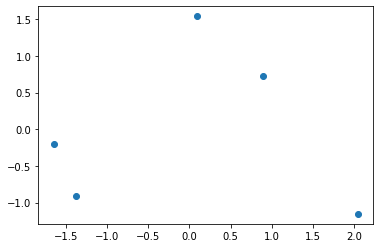

In [116]:
# Le plan principal est le plan contenant les variables C1 et C2, les deux premieres composantes principales
C = dot(Z, Pord)
print("Matrice des composantes principales :\n", around(C, 2), '\n')
C1 = C[:,0]
C2 = C[:,1]
print("C1 : ", around(C1, 2), '\n')
print("C2 : ", around(C2, 2), '\n')
scatter(C1, C2)
show()

**5.** Vérifier numériquement que $C1$ et $C2$ sont de moyenne nulle, que $cov(C1,C2)=0$, que la variance de $C1$ est égale à la plus grande valeur propre de $R$ et que la variance de $C2$ est égale à la valeur propre "du milieu". 

In [118]:
print("La moyenne de C1 est nulle :", around(mean(C1), 2) == 0, '\n')
print("La moyenne de C2 est nulle :", around(mean(C2), 2) == 0, '\n')
print("La variance de C1 (égale à la 1ere valeure propre de R) :", around(var(C1), 2), '\n')
print("La variance de C2 (égale à la 2nd valeure propre de R) :", around(var(C2), 2), '\n')
print("La covariance de C1 et C2 est nulle :", around(dot(C1.T, C2), 2) == 0)

La moyenne de C1 est nulle : True 

La moyenne de C2 est nulle : True 

La variance de C1 (égale à la 1ere valeure propre de R) : 1.92 

La variance de C2 (égale à la 2nd valeure propre de R) : 1.02 

La covariance de C1 et C2 est nulle : True


# Exercice 3 : programmation d'une ACP 

Le but de cet exercice est de programmer un outil tout prêt pour effectuer une ACP. Pour tester pas à pas les fonctions que nous allons définir, nous allons utiliser les données du fichier `demographie.xls` qui contient des statistiques d'une étude de 1987 concernant 166 pays.
Les statistiques des pays correspondent aux 15 variables (1 qualitative, 14 quantitatives) suivantes :
- COUNTRY : nom du pays
- POP87 : population en 1987
- NAT : taux de natalité
- MORT : taux de mortalité
- ACCR : taux d'accroissement de la population
- POP00 : population prévue pour 2000
- POP20 : population prévue pour 2020
- MORTI : taux de mortalité infantile
- FERTI : taux de fertilité
- AGE15 : proportion de la population  de moins de 15 ans
- AGE65 : proportion de la population  de plus de 65 ans
- ESPER : espérance de vie
- URBA : taux d'urbanisation
- PNB : produit national brut
- CONTI : continent (1=Afrique, 2=Asie, 3=Amérique, 4=Europe, 5=Océanie)

In [120]:
df =read_excel('datas/demographie.xls')
df.head()

,COUNTRY,POP87,NAT,MORT,ACCR,POP00,POP20,MORTI,FERTI,AGE15,AGE65,ESPER,URBA,PNB,CONTI
0,AFGANISTHAN,14.2,48,22,2.6,24.5,39.1,182.0,7.6,46,4,39,16,160.0,2
1,ALBANIA,3.1,26,6,2.0,3.8,4.6,43.0,3.3,35,5,71,34,900.0,4
2,ALGERIA,23.5,42,10,3.2,33.7,49.4,81.0,6.4,46,4,60,43,2530.0,1
3,ANGOLA,8.0,47,22,2.5,11.5,19.1,143.0,6.4,45,3,43,25,500.0,1
4,ANTIGUA ET BARBUDA,0.1,15,5,1.0,0.1,0.1,10.0,1.7,27,6,72,34,2030.0,3


On définit les arrays suivants:

-pays : les noms des pays

-continent : les numéros des continents

-data : les autres variables (qui sont quantitatives et donc adaptées à une ACP), ainsi que leurs labels.


In [122]:
pays = df['COUNTRY'].values
continent = df['CONTI'].values
data = df[['POP87','NAT','MORT','ACCR','POP00','POP20','MORTI','FERTI','AGE15','AGE65','ESPER','URBA','PNB']].values
labels=['87','NAT','MORT','ACCR','00','20','MORTI','FERTI','-15','+65','ESPER','URBA','PNB']

**Question 1.** Ecrire une fonction `normalise` qui prend en entrée un tableau de données contenant en ligne les individus et en colonne les variables, et fournit en sortie le tableau des données centrées réduites. Tester votre fonction sur la matrice `data`.

In [145]:
def normalise(X):
    Z = zeros((shape(X)[0], shape(X)[1]))
    for j in range(3) :
        Z[:,j] = (X[:,j] - mean(X[:,j])) / sqrt(var(X[:,j]))
    return Z
datanorm = normalise(data)
print("Matrice centrée et réduite :\n", around(datanorm, 2))

Matrice centrée et réduite :
 [[-0.15  1.21  1.98 ...  0.    0.    0.  ]
 [-0.25 -0.49 -0.99 ...  0.    0.    0.  ]
 [-0.06  0.75 -0.25 ...  0.    0.    0.  ]
 ...
 [ 0.01  0.98  0.68 ...  0.    0.    0.  ]
 [-0.22  1.37  0.68 ...  0.    0.    0.  ]
 [-0.19  1.14  0.12 ...  0.    0.    0.  ]]


**Question 2.** Ecrire une fonction `correlation` qui, étant donné un tableau de données (en ligne les individus, en colonne les variables), renvoie sa matrice de corrélation.  Testez votre fonction sur `data`.

In [150]:
def correlation(M):
    Z = normalise(M)
    R = 1/shape(M)[0] * dot(Z.T, Z)
    return R
R = correlation(data)
print("Matrice de corrélation :\n", around(R, 2))

Matrice de corrélation :
 [[ 1.   -0.1  -0.04  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [-0.1   1.    0.59  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [-0.04  0.59  1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  ]
 [

**Question 3.** En réutilisant les commandes écrites précédemment, construire une fonction `acp` qui prend en entrée un tableau de données et qui renvoie les valeurs principales ordonnées de manière décroissante, les vecteurs principaux et les composantes principales correspondantes. Testez votre fonction avec `data`.

In [140]:
def acp(R):
    val, P = eigh(R)
    ind = argsort(val)[::-1]
    val2 = sort(val)[::-1] # valeurs propres ordonnées de manière décroissante
    Pord = zeros((3,3))
    for i in range(3):
        Pord[:,i] = P[:,ind[i]]
    return val2, Pord

val2, Pord = acp(R)

print("Valeurs propres de R : \n", around(val, 2), '\n')
print("Somme des valeurs propres (egal à p, le nombre de variables) : \n", around(sum(val), 2), '\n')
print("Matrice contenant en colonnes les vecteurs propres de X \n", around(P, 2), '\n')


# Affichage et vérification
print("Indices ordonnés :")
print(argsort(val), "-->", ind, '\n')
print("Valeurs propres ordonnés :")
print(val, "-->", val2, '\n')
print("Vecteurs propres ordonnés :")
print(around(P[0,:], 2), "-->", around(Pord[0,:], 2))
print(around(P[1,:], 2), "-->", around(Pord[1,:], 2))
print(around(P[2,:], 2), "-->", around(Pord[2,:], 2))

Valeurs propres de R : 
 [0.05 1.02 1.92] 

Somme des valeurs propres (egal à p, le nombre de variables) : 
 3.0 

Matrice contenant en colonnes les vecteurs propres de X 
 [[ 0.7  -0.04  0.71]
 [ 0.21  0.96 -0.16]
 [-0.68  0.27  0.68]] 

Indices ordonnés :
[0 1 2] --> [2 1 0] 

Valeurs propres ordonnés :
[0.05475274 1.02132127 1.92392599] --> [1.92392599 1.02132127 0.05475274] 

Vecteurs propres ordonnés :
[ 0.7  -0.04  0.71] --> [ 0.71 -0.04  0.7 ]
[ 0.21  0.96 -0.16] --> [-0.16  0.96  0.21]
[-0.68  0.27  0.68] --> [ 0.68  0.27 -0.68]


**Question 4.** Vérifiez pour la matrice `data` que la matrice de covariance des composantes principales est une matrice diagonale dont les termes diagonaux sont les valeurs principales ordonnées de manière décroissante.

**Question 5.** À partir de `data`, représenter les points-individus dans le plan principal en nommant les axes (`CP 1`, `CP 2`).  

**Question 6.** Reprendre le graphique précédent en attribuant une couleur spécifique à l'individu en fonction de la variable `continent`. Commenter.